In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = ['mpg', 'cylinders', 'disp', 'hp', 'weight', 'accel', 'modelyr', 'origin', 'carname']
autompg = pd.read_csv('auto-mpg.csv', names = columns)
autompg.dropna(inplace = True)
autompg['hp'] = autompg['hp'].astype(np.float)

In [4]:
autompg

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70.0,1,"chevrolet,chevelle malibu"
1,15.0,8,350.0,165.0,3693.0,11.5,70.0,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70.0,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70.0,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70.0,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82.0,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82.0,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82.0,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82.0,1,ford ranger


In [5]:
autompg.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6
cylinders,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
weight,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
accel,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
modelyr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
origin,392.0,1.576531,0.805518,1.0,1.000,1.00,2.000,3.0


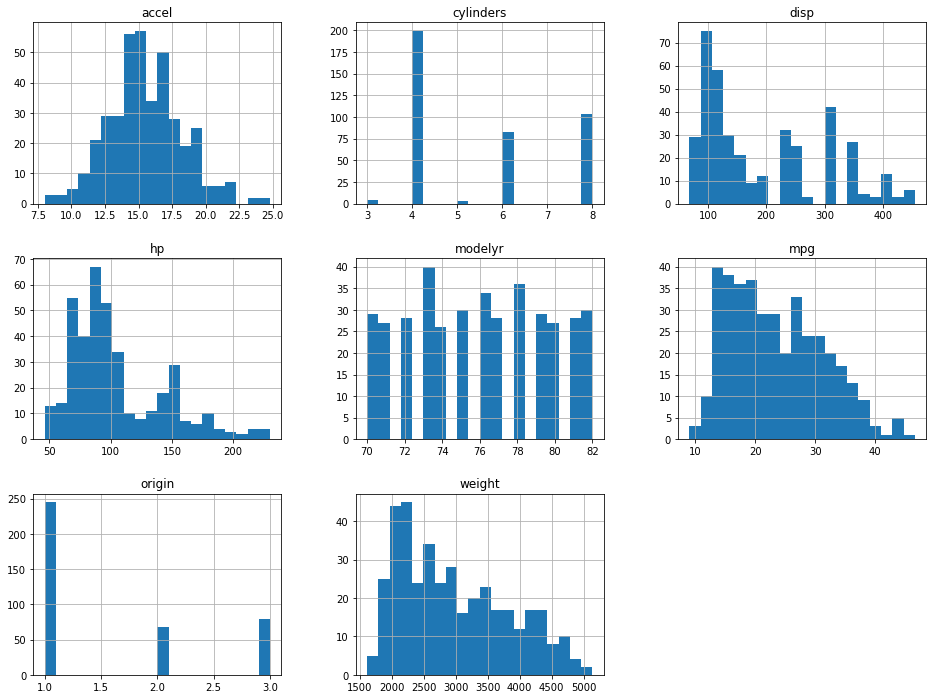

In [6]:
plt.rcParams['figure.figsize'] = 16, 12
autompg.hist(bins = 20)
plt.show()

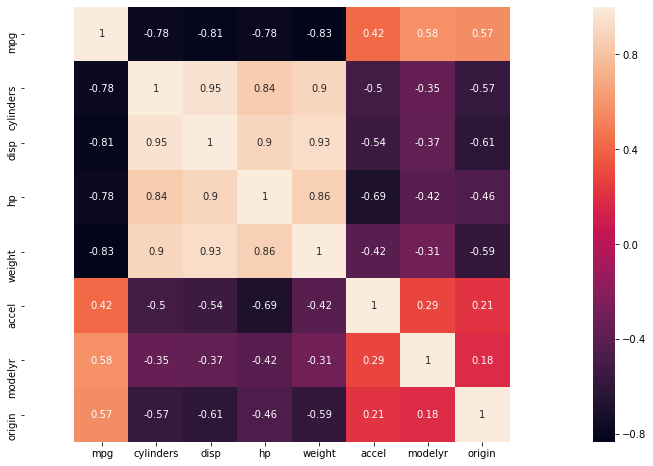

In [7]:
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(autompg.corr(), square = True, annot = True);
plt.axis('equal');

# shows all features are at least mildly correlated
# least correlated features are accel, modelyr, origin


In [8]:
autompg.corr()['mpg']

mpg          1.000000
cylinders   -0.777618
disp        -0.805127
hp          -0.778427
weight      -0.832244
accel        0.423329
modelyr      0.580541
origin       0.565209
Name: mpg, dtype: float64

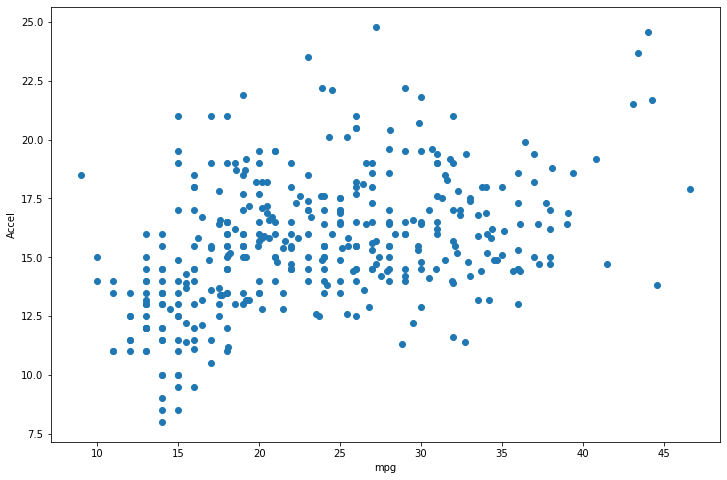

In [9]:
plt.scatter(autompg['mpg'], autompg['accel'])
plt.ylabel('Accel')
plt.xlabel('mpg')
plt.show()

# randomly arranged - seemingly no relationship

In [10]:
# Separate train test sets
from sklearn.model_selection import StratifiedShuffleSplit

test_size = 0.2
num_datapoints = len(autompg)
                     
weight_cat = pd.cut(autompg["weight"], bins=[0, 1500, 2000, 3500, np. inf], labels = [1, 2, 3, 4])
split = StratifiedShuffleSplit(n_splits = 1, test_size = test_size, random_state = 42) 
for train_index, test_index in split.split(autompg, weight_cat): 
    strat_train_set = autompg.iloc[train_index] 
    strat_test_set = autompg.iloc[test_index]

autompg_train = strat_train_set.copy()

In [11]:
avg_mpg = np.mean(autompg_train['mpg'])
baseline_preds = avg_mpg * np.ones(int(np.ceil(num_datapoints * test_size)))
y_test = strat_test_set.pop('mpg')

print(rmse(baseline_preds, y_test))

NameError: name 'rmse' is not defined

In [13]:
autompg_train

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin,carname
298,23.0,8,350.0,125.0,3900.0,17.4,79.0,1,cadillac eldorado
226,20.5,6,231.0,105.0,3425.0,16.9,77.0,1,buick skylark
122,24.0,4,121.0,110.0,2660.0,14.0,73.0,2,saab 99le
364,26.6,8,350.0,105.0,3725.0,19.0,81.0,1,oldsmobile cutlass ls
308,33.5,4,151.0,90.0,2556.0,13.2,79.0,1,pontiac phoenix
...,...,...,...,...,...,...,...,...,...
277,16.2,6,163.0,133.0,3410.0,15.8,78.0,2,peugeot 604sl
128,15.0,6,250.0,100.0,3336.0,17.0,74.0,1,chevrolet nova
259,20.8,6,200.0,85.0,3070.0,16.7,78.0,1,mercury zephyr
225,17.5,6,250.0,110.0,3520.0,16.4,77.0,1,chevrolet concours


In [14]:
autompg_train.corr()['mpg']

mpg          1.000000
cylinders   -0.778516
disp        -0.807674
hp          -0.781327
weight      -0.836770
accel        0.433985
modelyr      0.561238
origin       0.553627
Name: mpg, dtype: float64

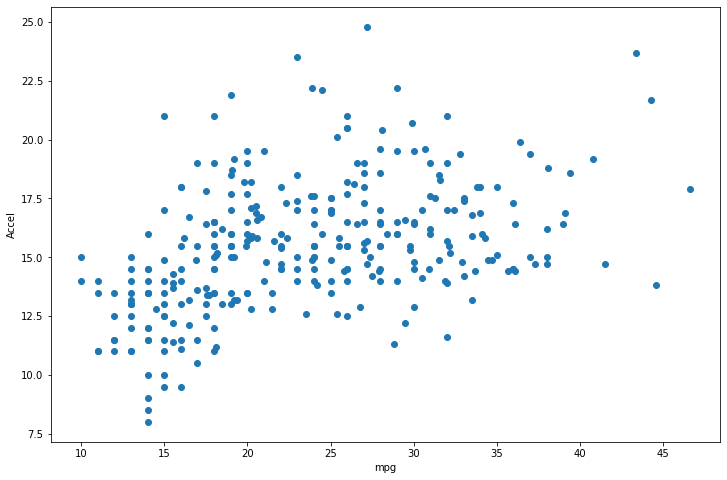

In [16]:
plt.scatter(autompg_train['mpg'], autompg_train['accel'])
plt.ylabel('Accel')
plt.xlabel('mpg')
plt.show()

# accel still looks random

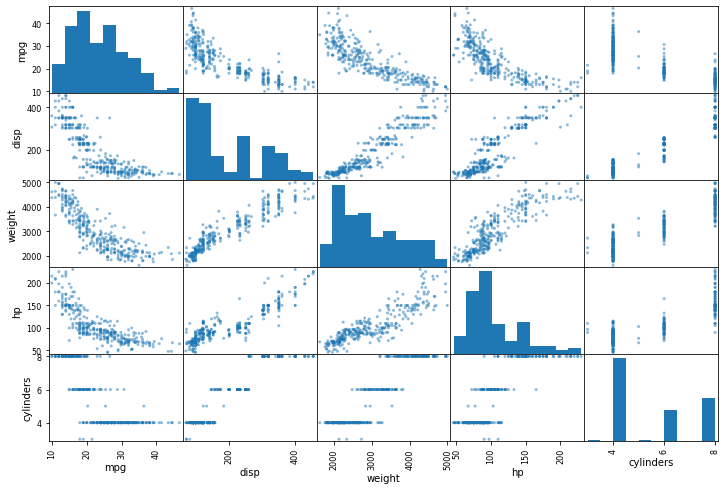

In [17]:
from pandas.plotting import scatter_matrix
corr_features = ['mpg', 'disp', 'weight', 'hp', 'cylinders']
scatter_matrix(autompg_train[corr_features], figsize = (12, 8));

# disp, weight, hp are tail heavy

In [18]:
autompg_train.head()

,mpg,cylinders,disp,hp,weight,accel,modelyr,origin,carname
298,23.0,8,350.0,125.0,3900.0,17.4,79.0,1,cadillac eldorado
226,20.5,6,231.0,105.0,3425.0,16.9,77.0,1,buick skylark
122,24.0,4,121.0,110.0,2660.0,14.0,73.0,2,saab 99le
364,26.6,8,350.0,105.0,3725.0,19.0,81.0,1,oldsmobile cutlass ls
308,33.5,4,151.0,90.0,2556.0,13.2,79.0,1,pontiac phoenix


In [19]:
autompg.columns

Index(['mpg', 'cylinders', 'disp', 'hp', 'weight', 'accel', 'modelyr',
       'origin', 'carname'],
      dtype='object')

In [20]:
y = autompg_train.pop('mpg')

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class ArrayTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X, y = None):
        return X.toarray()
    
class ToSeries(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        return X.squeeze()

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
cat_attribs = ['origin']
text_attribs = ['carname']
num_attribs = ['cylinders', 'disp', 'hp', 'weight', 'accel', 'modelyr']

In [24]:
def preprocess(dataset, max_features_tfv = None):
    num_pipeline = Pipeline([
        ('scaler', MinMaxScaler())
    ])

    cat_pipeline = Pipeline([
        ('ohe', OneHotEncoder(categories = 'auto'))
    ])
    
    cat_np = cat_pipeline.fit_transform(dataset[cat_attribs]).toarray()
    columns = ['American', 'European', 'Japanese']
    cat_df = pd.DataFrame(cat_np, columns = columns)

    num_np = num_pipeline.fit_transform(dataset[num_attribs])
    num_df = pd.DataFrame(num_np, columns = num_attribs)
    
    if max_features_tfv != None:
        
        text_pipeline = Pipeline([
            ('toseries', ToSeries()),
            ('tfv', TfidfVectorizer(max_features = max_features_tfv)),
            ('toarray', ArrayTransformer())
        ])
        
        text_np = text_pipeline.fit_transform(dataset[text_attribs])        
        columns = []
        idx_colname_dict = {value : key for key, value in text_pipeline['tfv'].vocabulary_.items()}
        for i in range(max_features_tfv):
            columns.append(idx_colname_dict[i])
        text_df = pd.DataFrame(text_np, columns = columns) 

        autompg_full_df = pd.concat([num_df, cat_df, text_df], axis = 1, sort = False)
    
    else:
        autompg_full_df = pd.concat([num_df, cat_df], axis = 1, sort = False)
        
    return autompg_full_df

In [36]:
autompg_full_df = preprocess(autompg_train, 55)
columns = autompg_full_df.columns

In [37]:
autompg_full_df

,cylinders,disp,hp,weight,accel,modelyr,American,European,Japanese,504,...,rabbit,saab,satellite,skylark,sw,torino,toyota,volkswagen,volvo,vw
0,1.0,0.728682,0.429348,0.675827,0.559524,0.750000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.6,0.421189,0.320652,0.535461,0.529762,0.583333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.775506,0.0,0.0,0.0,0.0,0.0,0.0
2,0.2,0.136951,0.347826,0.309397,0.357143,0.250000,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.728682,0.320652,0.624113,0.654762,0.916667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.2,0.214470,0.239130,0.278664,0.309524,0.750000,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308,0.6,0.245478,0.472826,0.531028,0.464286,0.666667,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
309,0.6,0.470284,0.293478,0.509161,0.535714,0.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
310,0.6,0.341085,0.211957,0.430556,0.517857,0.666667,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
311,0.6,0.470284,0.347826,0.563534,0.500000,0.583333,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


### Shortlisting models

In [38]:
from sklearn. model_selection import cross_val_score, cross_val_predict

from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

In [39]:
predictions_df = pd.DataFrame()

In [40]:
# Random Forests
et_reg = RandomForestRegressor(n_estimators = 10, random_state = 7)
scores = cross_val_score(et_reg, autompg_full_df, y, scoring = "neg_root_mean_squared_error", cv = 5)
et_preds = cross_val_predict(et_reg, autompg_full_df, y, cv = 5)

predictions_df['et'] = et_preds
et_mean_rmse = np.mean(-scores)
print(et_mean_rmse) #shortlisted

2.509193500535862


In [41]:
# ExtraTreesRegressor
et_reg = ExtraTreesRegressor(n_estimators = 10, random_state = 7)
scores = cross_val_score(et_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
et_preds = cross_val_predict(et_reg, autompg_full_df, y, cv = 5)

predictions_df['ET'] = et_preds
et_mean_rmse = np.mean(np.sqrt(-scores))
print(et_mean_rmse) #shortlisted

2.5387950710020566


In [42]:
# xgboost
xgb_reg = XGBRegressor(n_estimators = 10, random_state = 7)
scores = cross_val_score(xgb_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
xgb_preds = cross_val_predict(xgb_reg, autompg_full_df, y, cv = 5)

predictions_df['XGB'] = xgb_preds
xgb_mean_rmse = np.mean(np.sqrt(-scores))
print(xgb_mean_rmse) #shortlisted

2.6612290913267143


In [43]:
# SVR
svr_reg = SVR(gamma = 'scale')
scores = cross_val_score(svr_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
svr_preds = cross_val_predict(svr_reg, autompg_full_df, y, cv = 5)

predictions_df['SVR'] = svr_preds
svr_mean_rmse = np.mean(np.sqrt(-scores))
print(svr_mean_rmse)

3.8005195479931557


In [44]:
# Ridge
ridge_reg = Ridge(alpha = 0.001)
scores = cross_val_score(ridge_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
ridge_preds = cross_val_predict(ridge_reg, autompg_full_df, y, cv = 5)

predictions_df['Ridge'] = ridge_preds
ridge_mean_rmse = np.mean(np.sqrt(-scores))
print(ridge_mean_rmse)

3.205528379625535


In [45]:
# Lasso
lasso_reg = Lasso(alpha = 0.05)
scores = cross_val_score(lasso_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
lasso_preds = cross_val_predict(lasso_reg, autompg_full_df, y, cv = 5)

predictions_df['Lasso'] = lasso_preds
lasso_mean_rmse = np.mean(np.sqrt(-scores))
print(lasso_mean_rmse)

3.160871304526051


In [56]:
# KNeighborsRegressor
knn_reg = KNeighborsRegressor(n_neighbors = 30)
scores = cross_val_score(knn_reg, autompg_full_df, y, scoring = "neg_mean_squared_error", cv = 5)
knn_preds = cross_val_predict(knn_reg, autompg_full_df, y, cv = 5)

predictions_df['KNN'] = knn_preds
knn_mean_rmse = np.mean(np.sqrt(-scores))
print(knn_mean_rmse)

4.119366624711124


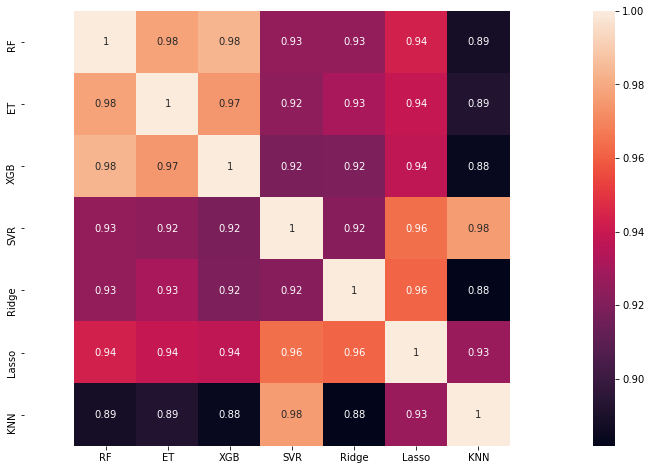

In [57]:
# checking correlation between predictions (for potential ensembles)
plt.rcParams['figure.figsize'] = 12, 8
sns.heatmap(predictions_df.corr(), square = True, annot = True);
plt.axis('equal');

In [58]:
et_reg.fit(autompg_full_df, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)

In [59]:
ranked_features = [columns[idx] for idx in np.argsort(et_reg.feature_importances_)]
ranked_features.reverse()
print(ranked_features[:15])

['weight', 'disp', 'cylinders', 'modelyr', 'hp', 'accel', 'Japanese', 'rabbit', 'vw', 'chevrolet', 'diesel', 'American', 'European', 'audi', 'datsun']


### Grid search on shortlisted algorithms

In [60]:
from scipy.stats import uniform
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [61]:
best_features_tfv = None
best_score = np.inf
best_et_reg = None
for features_tfv in [55, 60]:
    
    autompg_prep = preprocess(autompg_train, features_tfv)
    et_pipeline = Pipeline([('et', DummyRegressor())]) # placeholder estimator
    param_grid = {
            'et': [RandomForestRegressor(random_state = 7)],
            'et__n_estimators': [100, 500],
            'et__max_depth': [30, 40, 50, 60],
            'et__min_samples_split': [2, 5, 10],
            'et__min_samples_leaf': [1, 2, 4],
    }

    search = RandomizedSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                                random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

    et_reg = search.fit(autompg_prep, y).best_estimator_[0]
    if best_score > (-search.best_score_):
        best_score = -search.best_score_
        best_et_reg = et_reg
        best_features_tfv = features_tfv

print(best_features_tfv, ":", best_et_reg)
print(best_score)

55 : RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=60, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)
2.4198025438750728


In [62]:
best_features_tfv = None
best_score = np.inf
best_et_reg = None
for features_tfv in [55, 60]:
    
    autompg_prep = preprocess(autompg_train, features_tfv)
    et_pipeline = Pipeline([('et', DummyRegressor())]) # placeholder estimator
    param_grid = {
            'et': [ExtraTreesRegressor(random_state = 7)],
            'et__n_estimators': [10, 100, 1000],
            'et__max_depth': [10, 100],
            'et__min_samples_split': [2, 5, 10],
            'et__min_samples_leaf': [1, 2, 4],
    }

    search = RandomizedSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                                random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

    et_reg = search.fit(autompg_prep, y).best_estimator_[0]
    if best_score > (-search.best_score_):
        best_score = -search.best_score_
        best_et_reg = et_reg
        best_features_tfv = features_tfv

print(best_features_tfv, ":", best_et_reg)
print(best_score)

55 : ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=100, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=10, min_weight_fraction_leaf=0.0,
                    n_estimators=10, n_jobs=None, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)
2.3379709933237596


In [63]:
best_features_tfv = None
best_score = np.inf
best_xgb_reg = None
for features_tfv in [55, 60]:
    
    autompg_prep = preprocess(autompg_train, features_tfv)
    xgb_pipeline = Pipeline([('xgb', DummyRegressor())]) # placeholder estimator
    param_grid = {
            'xgb': [XGBRegressor(random_state = 7)],
            'xgb__eta': uniform(0.08, 0.05),
            'xgb__gamma': uniform(1.0, 1),
            'xgb__max_depth': [2, 20, 30, 40],
    }

    search = RandomizedSearchCV(xgb_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                                random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

    xgb_reg = search.fit(autompg_prep, y).best_estimator_[0]
    if best_score > (-search.best_score_):
        best_score = -search.best_score_
        best_xgb_reg = xgb_reg
        best_features_tfv = features_tfv

print(best_features_tfv, ":", best_xgb_reg)
print(best_score)

55 : XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.09964711549354209,
             gamma=1.6743304229389548, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.0996471122,
             max_delta_step=0, max_depth=30, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)
2.346164054735838


In [64]:
# best max_features_tfv = 55; so far = 2.338 - ET
# Moving forward, we only look at ExtraTrees and XGBoost

In [65]:
autompg_prep = preprocess(autompg_train, 55)
columns = autompg_prep.columns
best_et_reg.fit(autompg_prep, y)
ranked_features = [columns[idx] for idx in np.argsort(best_et_reg.feature_importances_)]
ranked_features.reverse()

In [75]:
# feature selection 

best_nfeatures = None
best_score = np.inf
best_et_reg = None
for nfeatures in [13, 15, 17]:
    
    autompg_prep_sub = autompg_prep[ranked_features[:nfeatures]]
    et_pipeline = Pipeline([('et', DummyRegressor())]) # placeholder estimator
    param_grid = {
            'et': [ExtraTreesRegressor(random_state = 7)],
            'et__n_estimators': [10, 100, 1000],
            'et__max_depth': [10, 100],
            'et__min_samples_split': [2, 5, 10],
            'et__min_samples_leaf': [1, 2, 4],
    }

    search = RandomizedSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                                random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

    et_reg = search.fit(autompg_prep_sub, y).best_estimator_[0]
    if best_score > (-search.best_score_):
        best_score = -search.best_score_
        best_et_reg = et_reg
        best_nfeatures = nfeatures

print(best_nfeatures, ":", best_et_reg)
print(best_score) # top 15 features were seen to be most important

15 : ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=100, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=1000, n_jobs=None, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)
2.295104151538708


In [80]:
sel_features = ranked_features[:nfeatures]
sel_features

['disp',
 'weight',
 'cylinders',
 'modelyr',
 'hp',
 'accel',
 'Japanese',
 'vw',
 'American',
 'European',
 'volkswagen',
 'datsun',
 'diesel',
 'oldsmobile',
 'ford',
 'chevrolet',
 'toyota']

In [79]:
# Trying PCA
from sklearn.decomposition import PCA
best_ncomponents = None
best_score = np.inf
best_et_reg = None
for ncomponents in [15, 20]:
    
    pca = PCA(n_components = ncomponents)
    autompg_prep_sub = pca.fit_transform(autompg_prep)
    et_pipeline = Pipeline([('et', DummyRegressor())]) # placeholder estimator
    param_grid = {
            'et': [ExtraTreesRegressor(random_state = 7)],
            'et__n_estimators': [10, 100, 1000],
            'et__max_depth': [10, 100],
            'et__min_samples_split': [2, 5, 10],
            'et__min_samples_leaf': [1, 2, 4],
    }

    search = RandomizedSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                                random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

    et_reg = search.fit(autompg_prep_sub, y).best_estimator_[0]
    if best_score > (-search.best_score_):
        best_score = -search.best_score_
        best_et_reg = et_reg
        best_ncomponents = ncomponents

print(best_ncomponents, ":", best_et_reg) 
print(best_score) # Worse results with PCA

17 : ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=100, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=1000, n_jobs=None, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)
2.6694985726743754


In [81]:
def full_preprocess(dataset, max_features_tfv, sel_features):
    dataset_pipe = preprocess(dataset, max_features_tfv = 55)
    dataset_prep = dataset_pipe[sel_features]
    return dataset_prep    

autompg_prep = full_preprocess(autompg_train, 55, sel_features)

In [83]:
rf_pipeline = Pipeline([('rf', DummyRegressor())]) # placeholder estimator
param_grid = {
        'rf': [RandomForestRegressor(random_state = 7)],
        'rf__n_estimators': [100, 500],
        'rf__max_depth': [30, 40, 50, 60],
        'rf__min_samples_split': [2, 5, 10],
        'rf__min_samples_leaf': [1, 2, 4],
}

search = RandomizedSearchCV(rf_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                            random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

best_rf_reg = search.fit(autompg_prep, y).best_estimator_[0]
print(best_rf_reg)
print(-search.best_score_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=40, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=7, verbose=0, warm_start=False)
2.3963015052468277


In [84]:
et_pipeline = Pipeline([('et', DummyRegressor())]) # placeholder estimator
param_grid = {
        'et': [ExtraTreesRegressor(random_state = 7)],
        'et__n_estimators': [10, 100, 1000],
        'et__max_depth': [10, 100],
        'et__min_samples_split': [2, 5, 10],
        'et__min_samples_leaf': [1, 2, 4],
}

search = RandomizedSearchCV(et_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                            random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

best_et_reg = search.fit(autompg_prep, y).best_estimator_[0]
print(best_et_reg)
print(-search.best_score_)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=100, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=5, min_weight_fraction_leaf=0.0,
                    n_estimators=1000, n_jobs=None, oob_score=False,
                    random_state=7, verbose=0, warm_start=False)
2.3145180076314915


In [87]:
xgb_pipeline = Pipeline([('xgb', DummyRegressor())]) # placeholder estimator
param_grid = {
        'xgb': [XGBRegressor(random_state = 7)],
        'xgb__eta': uniform(0.08, 0.05),
        'xgb__gamma': uniform(1.0, 1),
        'xgb__max_depth': [2, 20, 30, 40],
}

search = RandomizedSearchCV(xgb_pipeline, param_grid, cv = 5, verbose = 0, n_jobs = -1, 
                            random_state = 7, n_iter = 20, scoring = 'neg_root_mean_squared_error')

best_xgb_reg = search.fit(autompg_prep, y).best_estimator_[0]
print(best_xgb_reg)
print(-search.best_score_)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=0.12647640955865608,
             gamma=1.262583770043397, gpu_id=-1, importance_type='gain',
             interaction_constraints=None, learning_rate=0.126476407,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror', random_state=7,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None)
2.328914360114768
